# ***Multi Output Regression Analysis using Keras/Tensorflow***

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# !unzip "/content/datasetforshare.zip"
!unzip "/content/dataset.zip"

**Reading Training Samples**

In [ ]:
path = "/content/datasetforshare/Train_Input/"
files_list = os.listdir(path)
# sorted_files_list = sorted(files_list,key=lambda item: int (item.split(".")[0]))
sorted_files_list = sorted(files_list)
input_files = sorted_files_list

In [ ]:
features_list = []
for file_name in input_files:
  file_path = os.path.join(path,file_name)
  input_features_row = [i.strip().split() for i in open(file_path).readlines()]
  input_features_row = np.array(input_features_row).reshape(-1).tolist()
  input_features_row = [float(a) for a in input_features_row]
  features_list.append(np.array(input_features_row))
  pass

In [ ]:
features = np.asarray(features_list)
print(features.shape)

(686, 138)


In [ ]:
path = "/content/datasetforshare/Train_Output/"
files_list = os.listdir(path)
# sorted_files_list = sorted(files_list,key=lambda item: int (item.split(".")[0]))
sorted_files_list = sorted(files_list)
output_files = sorted_files_list

In [ ]:
output_list = []
for file_name in output_files:
  file_path = os.path.join(path,file_name)
  output_row = [i.strip().split() for i in open(file_path).readlines()]
  # output_row = np.array([a[1:-1] for a in output_row]).reshape(-1).tolist()
  output_row = np.array([a for a in output_row]).reshape(-1).tolist()
  output_row = [float(x) for x in output_row]
  output_list.append(np.array(output_row))
  pass

In [ ]:
output_array = np.asarray(output_list)
print(output_array.shape)

(686, 4)


In [ ]:
# number = 0
# for i in range(len(input_files)):
#   if (input_files[i].split(".")[0] == output_files[i].split(".")[0]):
#     number = number + 1
#     pass
#   pass
# print(number)

In [ ]:
x_train, y_train = features,output_array

In [ ]:
print(x_train.shape, y_train.shape)

(686, 138) (686, 4)


**Validation dataset**

In [ ]:
path = "/content/datasetforshare/Validation_Input/"

files_list = os.listdir(path)
# sorted_files_list = sorted(files_list,key=lambda item: int (item.split(".")[0]))
sorted_files_list = sorted(files_list)
validation_input_files = sorted_files_list

In [ ]:
validation_features_list = []

for file_name in validation_input_files:
  file_path = os.path.join(path,file_name)
  validation_features_row = [i.strip().split() for i in open(file_path).readlines()]
  validation_features_row = np.array(validation_features_row).reshape(-1).tolist()
  validation_features_row = [float(x) for x in validation_features_row]
  validation_features_list.append(np.array(validation_features_row))
  pass

In [ ]:
x_val = np.asarray(validation_features_list)

In [ ]:
path = "/content/datasetforshare/Validation_Output/"
files_list = os.listdir(path)
# sorted_files_list = sorted(files_list,key=lambda item: int (item.split(".")[0]))
sorted_files_list = sorted(files_list)
validation_output_files = sorted_files_list

In [ ]:
validation_output_list = []
for file_name in validation_output_files:
  file_path = os.path.join(path,file_name)
  validation_output_row = [i.strip().split() for i in open(file_path).readlines()]
  # validation_output_row = np.array([a[1:-1] for a in validation_output_row]).reshape(-1).tolist()
  validation_output_row = np.array([a for a in validation_output_row]).reshape(-1).tolist()
  validation_output_row = [float(x) for x in validation_output_row]
  validation_output_list.append(np.array(validation_output_row))
  pass

In [ ]:
y_val = np.asarray(validation_output_list)

In [ ]:
print(x_val.shape, y_val.shape)

(61, 138) (61, 4)


**testing dataset**

In [ ]:
path = "/content/datasetforshare/Test_Input/"

files_list = os.listdir(path)
# sorted_files_list = sorted(files_list,key=lambda item: int (item.split(".")[0]))
sorted_files_list = sorted(files_list)
testing_input_files = sorted_files_list

In [ ]:
testing_features_list = []

for file_name in testing_input_files:
  file_path = os.path.join(path,file_name)
  testing_features_row = [i.strip().split() for i in open(file_path).readlines()]
  testing_features_row = np.array(testing_features_row).reshape(-1).tolist()
  testing_features_row = [float(x) for x in testing_features_row]
  testing_features_list.append(np.array(testing_features_row))
  pass

In [ ]:
x_test = np.asarray(testing_features_list)

In [ ]:
path = "/content/datasetforshare/Test_Output/"
files_list = os.listdir(path)
# sorted_files_list = sorted(files_list,key=lambda item: int (item.split(".")[0]))
sorted_files_list = sorted(files_list)
testing_output_files = sorted_files_list

In [ ]:
testing_output_list = []
for file_name in testing_output_files:
  file_path = os.path.join(path,file_name)
  testing_output_row = [i.strip().split() for i in open(file_path).readlines()]
  # testing_output_row = np.array([a[1:-1] for a in testing_output_row]).reshape(-1).tolist()
  testing_output_row = np.array([a for a in testing_output_row]).reshape(-1).tolist()
  testing_output_row = [float(x) for x in testing_output_row]
  testing_output_list.append(np.array(testing_output_row))
  pass

In [ ]:
y_test = np.asarray(testing_output_list)

In [ ]:
print(x_test.shape, y_test.shape)

(61, 138) (61, 4)


Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
x_val = scaler.fit_transform(x_val.reshape(-1, x_val.shape[-1])).reshape(x_val.shape)
x_test = scaler.fit_transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)

In [ ]:
print('Minimum : ',np.min(x_train))
print('Maximum : ',np.max(x_train))
print('Minimum : ',np.min(x_val))
print('Maximum : ',np.max(x_val))
print('Minimum : ',np.min(x_test))
print('Maximum : ',np.max(x_test))

Minimum :  -1.5414
Maximum :  1.11156
Minimum :  -1.46812
Maximum :  1.08804
Minimum :  -1.5453
Maximum :  1.06925


In [ ]:
print('Minimum : ',np.min(y_train))
print('Maximum : ',np.max(y_train))
print('Minimum : ',np.min(y_val))
print('Maximum : ',np.max(y_val))
print('Minimum : ',np.min(y_test))
print('Maximum : ',np.max(y_test))

Minimum :  0.0102591092211533
Maximum :  14.99146110056926
Minimum :  0.012136611225356402
Maximum :  14.994307400379506
Minimum :  0.010186433174691489
Maximum :  14.97438330170778


In [ ]:
import tensorflow as tf
import keras
from keras.layers import Input,Dense
from keras.models import Sequential

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


In [ ]:
def regression_model(input_shape=138,output_shape=4):

  model = Sequential()
  model.add(Dense(32, input_dim=input_shape, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(output_shape, kernel_initializer='he_uniform'))
  optimizer = Adam(learning_rate=0.001)
  model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['accuracy','mean_squared_error', 'mean_absolute_error'])
  #model.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
  return model
  pass

In [ ]:
# get model
model = regression_model(input_shape = x_train.shape[1], output_shape = y_train.shape[1])

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_mean_squared_error', patience=5)

history = model.fit(x_train, y_train, validation_data=(x_val,y_val),epochs=500, callbacks=[early_stopping_callback])

Epoch 1/500
22/22 [==============================] - 0s 9ms/step - loss: 0.0198 - accuracy: 1.0000 - mean_squared_error: 0.0198 - mean_absolute_error: 0.0746 - val_loss: 0.0222 - val_accuracy: 1.0000 - val_mean_squared_error: 0.0222 - val_mean_absolute_error: 0.0761
Epoch 2/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0199 - accuracy: 1.0000 - mean_squared_error: 0.0199 - mean_absolute_error: 0.0749 - val_loss: 0.0230 - val_accuracy: 1.0000 - val_mean_squared_error: 0.0230 - val_mean_absolute_error: 0.0780
Epoch 3/500
22/22 [==============================] - 0s 6ms/step - loss: 0.0192 - accuracy: 1.0000 - mean_squared_error: 0.0192 - mean_absolute_error: 0.0745 - val_loss: 0.0214 - val_accuracy: 1.0000 - val_mean_squared_error: 0.0214 - val_mean_absolute_error: 0.0738
Epoch 4/500
22/22 [==============================] - 0s 6ms/step - loss: 0.0184 - accuracy: 1.0000 - mean_squared_error: 0.0184 - mean_absolute_error: 0.0721 - val_loss: 0.0204 - val_accuracy: 1.0000

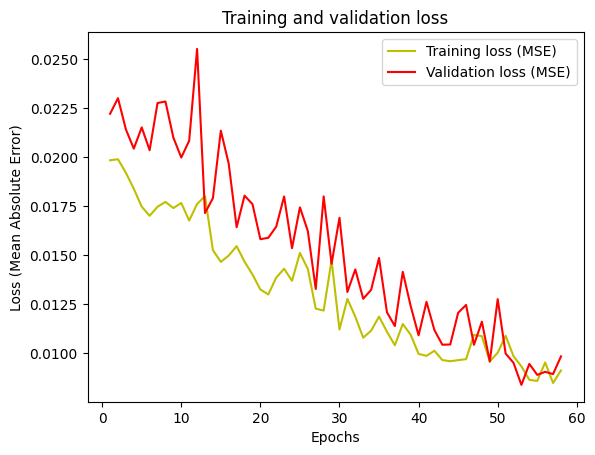

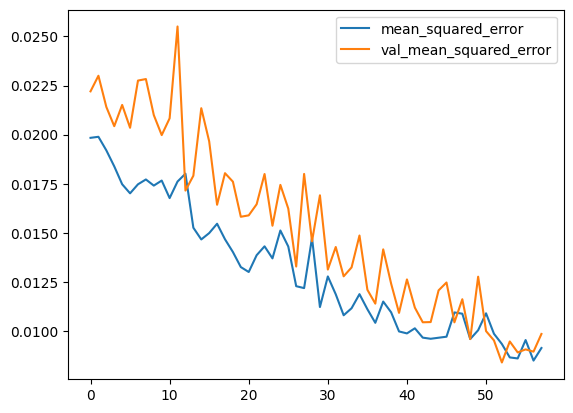

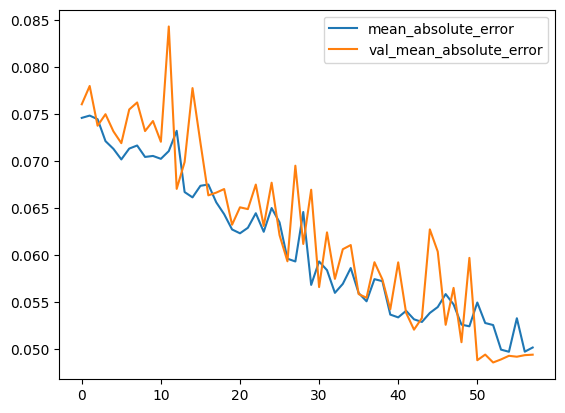

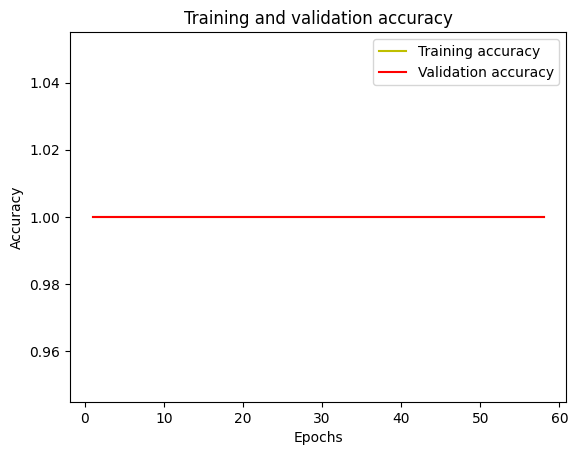

In [ ]:
##################################################################


#plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss (MSE)')
plt.plot(epochs, val_loss, 'r', label='Validation loss (MSE)')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Absolute Error)')
plt.legend()
plt.show()


#plot the loss and validation loss of the dataset
plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
plt.plot(history.history['val_mean_squared_error'], label='val_mean_squared_error')

plt.legend()
plt.show()


#plot the loss and validation loss of the dataset
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'], label='val_mean_absolute_error')

plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#################################################

In [ ]:
# evaluate model
scores =  model.evaluate(x_test, y_test)

print()
print('Mean Squared Error : ', scores[2])
print('Mean Absolute Error : ', scores[3])


2/2 [==============================] - 0s 8ms/step - loss: 0.0115 - accuracy: 1.0000 - mean_squared_error: 0.0115 - mean_absolute_error: 0.0545

Mean Squared Error :  0.011524754576385021
Mean Absolute Error :  0.05445306375622749


In [ ]:
Y_pred = model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, Y_pred, s=10, c='green')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1])
plt.plot()

2/2 [==============================] - 0s 5ms/step


[]

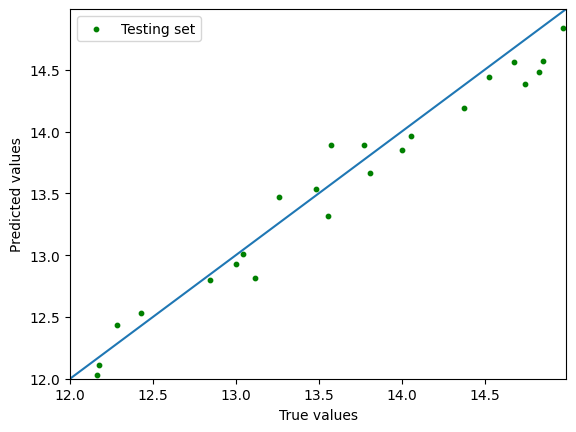

In [ ]:
Y_pred = model.predict(x_test).flatten()
Y_train_pred = model.predict(x_train).flatten()
Y_val_pred = model.predict(x_val).flatten()

# maximum = np.max(y_train)
maximum = np.max(y_train.flatten())

# plt.scatter(y_train, Y_train_pred, s=10, c='red', label='training set')
# plt.scatter(y_val, Y_val_pred, s=10, c='blue', label='validation set')
plt.scatter(y_test.flatten()[150:], Y_pred[150:], s=10, c='green', label='Testing set')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([12, maximum])
plt.ylim([12, maximum])
plt.plot([12, maximum], [12, maximum])

plt.legend()
plt.plot()

# #specify axis tick step sizes
# plt.xticks(np.arange(np.min(y_test), np.max(y_test)+1, 1.0))
# plt.yticks(np.arange(np.min(Y_pred), np.max(Y_pred)+1, 1.0))

2/2 [==============================] - 0s 11ms/step


[]

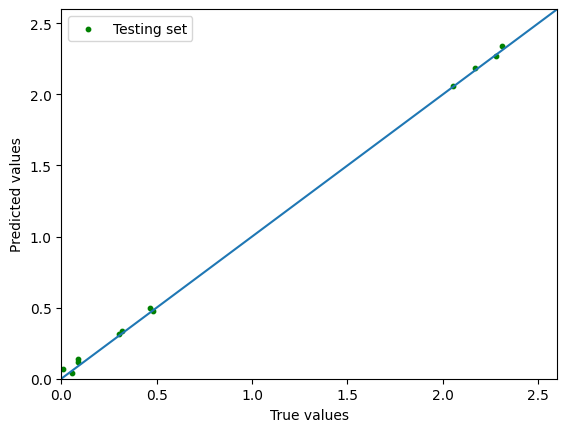

In [ ]:
Y_pred = model.predict(x_test).flatten()
Y_train_pred = model.predict(x_train).flatten()
Y_val_pred = model.predict(x_val).flatten()

# maximum = np.max(y_train)
maximum = 2.6

# plt.scatter(y_train, Y_train_pred, s=10, c='red', label='training set')
# plt.scatter(y_val, Y_val_pred, s=10, c='blue', label='validation set')
plt.scatter(y_test.flatten()[0:16], Y_pred[0:16], s=10, c='green', label='Testing set')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, maximum])
plt.ylim([0, maximum])
plt.plot([0, maximum], [0, maximum])

plt.legend()
plt.plot()

# #specify axis tick step sizes
# plt.xticks(np.arange(np.min(y_test), np.max(y_test)+1, 1.0))
# plt.yticks(np.arange(np.min(Y_pred), np.max(Y_pred)+1, 1.0))

### Plotting Linear regression

### Calculating Prediction

change sample number between 0-61

In [ ]:
#print(np.expand_dims(x_test[0],axis=1).shape)

sample_number = 25
input_test_sample = x_test[sample_number]

input_list = []

input_list.append(input_test_sample)

output = model.predict(np.array(input_list))

print()
print('Input test Sample = ')
print()
print(x_test[sample_number].shape)

print()
print('Output prediction shape = ')
print(output.shape)

print()
print('Output prediction = ')
print(output)

print()
print('Actual Output = ')
print(y_test[sample_number])

1/1 [==============================] - 0s 21ms/step

Input test Sample = 

(138,)

Output prediction shape = 
(1, 4)

Output prediction = 
[[ 2.233671    0.3962169   0.04676034 14.721535  ]]

Actual Output = 
[ 2.20850879  0.40645161  0.0469137  14.86907021]


### **Hyperparameters Optimization using Bayesian Optimization (keras Tuner API)**

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
from keras_tuner import BayesianOptimization
from kerastuner import Objective

In [ ]:
def funtion_model(hp):

  input_shape = 138
  output_shape = 4

  model = Sequential()
  activation_function = hp.Choice("activation_function", ["relu", "tanh"])
  #number_of_hidden_layers = hp.Int('number_of_top_layers', 2, 5)
  number_of_hidden_layers = hp.Int('number_of_top_layers', 1, 2)
  for i in range(number_of_hidden_layers):
    hidden_units = hp.Int('hidden_units_' + str(i),min_value=32,max_value=64,step=32)
    model.add(Dense(units = hidden_units, activation = activation_function, kernel_initializer ='he_uniform'))
    pass

  model.add(Dense(output_shape, kernel_initializer='he_uniform'))
  # hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
  optimizer = Adam(learning_rate=hp_learning_rate)
  model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy','mean_squared_error','mean_absolute_error'])
  return model
  pass

In [ ]:
BayesianOptimization_tuner = BayesianOptimization(
    funtion_model,
    objective=Objective('val_mean_squared_error', direction="max"),
    num_initial_points=50,
    max_trials=15,
    directory='/content/directory',
    project_name='sub_directory')

early_stopping_callback = EarlyStopping(monitor='val_mean_squared_error', patience=5)

In [ ]:
BayesianOptimization_tuner.search(x_train, y_train,epochs=100,validation_data=(x_val, y_val),callbacks=[early_stopping_callback])

Trial 15 Complete [00h 00m 13s]
val_mean_squared_error: 21.35289192199707

Best val_mean_squared_error So Far: 21.35289192199707
Total elapsed time: 00h 02m 22s


In [ ]:
BayesianOptimization_tuner.results_summary()

In [ ]:
best_hps = BayesianOptimization_tuner.get_best_hyperparameters(num_trials=1)[0]
pd.DataFrame(best_hps.values,index=[0])

,activation_function,number_of_top_layers,hidden_units_0,learning_rate,hidden_units_1
0,relu,2,64,0.001,32


**Creating Model with best hyper_parameters**

In [ ]:
model = BayesianOptimization_tuner.hypermodel.build(best_hps)
print(model.build(input_shape=(138,1)))
print(model.summary())

None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (138, 64)                 128       
                                                                 
 dense_4 (Dense)             (138, 32)                 2080      
                                                                 
 dense_5 (Dense)             (138, 4)                  132       
                                                                 
Total params: 2340 (9.14 KB)
Trainable params: 2340 (9.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model = BayesianOptimization_tuner.hypermodel.build(best_hps)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val,y_val),epochs=500,callbacks=[early_stopping_callback])

Epoch 1/500
22/22 [==============================] - 1s 12ms/step - loss: 26.7305 - accuracy: 0.9985 - mean_squared_error: 26.7305 - mean_absolute_error: 4.1205 - val_loss: 10.1779 - val_accuracy: 1.0000 - val_mean_squared_error: 10.1779 - val_mean_absolute_error: 2.8946
Epoch 2/500
22/22 [==============================] - 0s 5ms/step - loss: 3.0693 - accuracy: 1.0000 - mean_squared_error: 3.0693 - mean_absolute_error: 1.3513 - val_loss: 0.9036 - val_accuracy: 1.0000 - val_mean_squared_error: 0.9036 - val_mean_absolute_error: 0.7786
Epoch 3/500
22/22 [==============================] - 0s 4ms/step - loss: 0.5652 - accuracy: 1.0000 - mean_squared_error: 0.5652 - mean_absolute_error: 0.5663 - val_loss: 0.2972 - val_accuracy: 1.0000 - val_mean_squared_error: 0.2972 - val_mean_absolute_error: 0.3832
Epoch 4/500
22/22 [==============================] - 0s 4ms/step - loss: 0.2664 - accuracy: 1.0000 - mean_squared_error: 0.2664 - mean_absolute_error: 0.3268 - val_loss: 0.1840 - val_accuracy: 1

**Plotting history graphs of evaluation metrics**

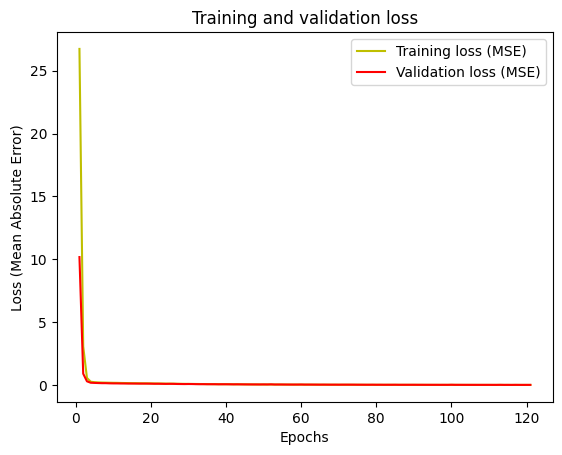

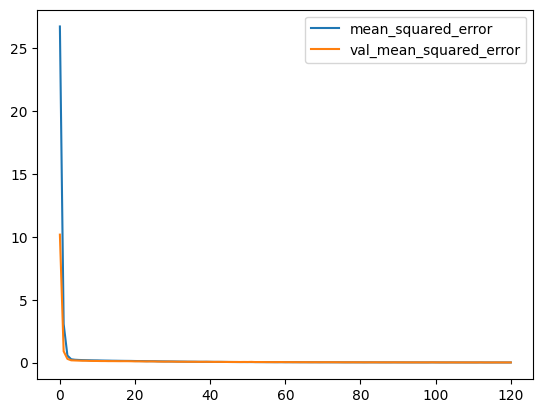

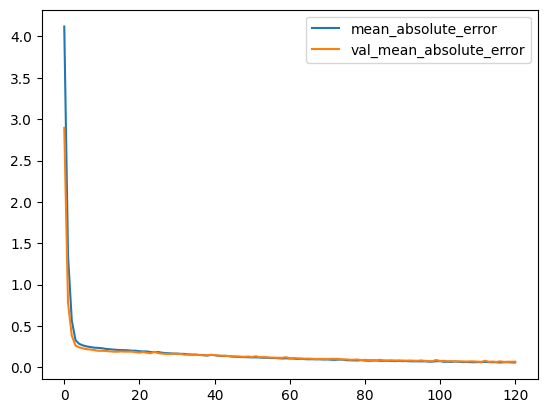

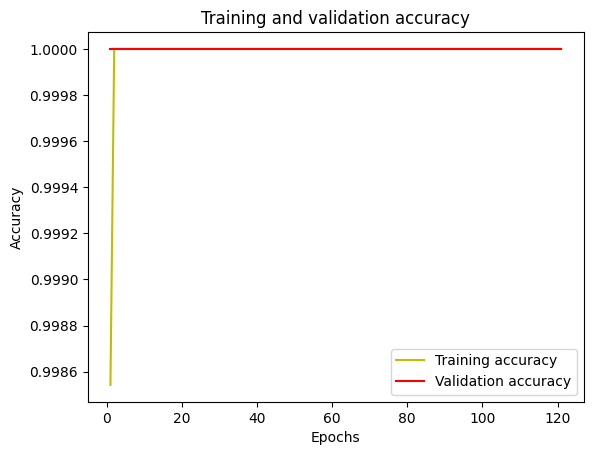

In [ ]:
##################################################################


#plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss (MSE)')
plt.plot(epochs, val_loss, 'r', label='Validation loss (MSE)')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Absolute Error)')
plt.legend()
plt.show()


#plot the loss and validation loss of the dataset
plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
plt.plot(history.history['val_mean_squared_error'], label='val_mean_squared_error')

plt.legend()
plt.show()


#plot the loss and validation loss of the dataset
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'], label='val_mean_absolute_error')

plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#################################################

**Model Evaluation Scores**

In [ ]:
# evaluate model
scores =  model.evaluate(x_test, y_test)

print()
print('Mean Squared Error : ', scores[2])
print('Mean Absolute Error : ', scores[3])


2/2 [==============================] - 0s 9ms/step - loss: 0.0136 - accuracy: 1.0000 - mean_squared_error: 0.0136 - mean_absolute_error: 0.0673

Mean Squared Error :  0.013635551556944847
Mean Absolute Error :  0.06725937128067017


**Generating Regression Line**

2/2 [==============================] - 0s 8ms/step


[]

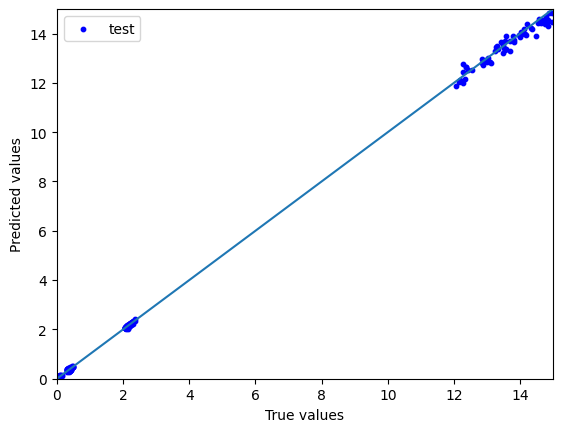

In [ ]:
Y_train_pred = model.predict(x_train).flatten()
Y_val_pred = model.predict(x_val).flatten()
Y_test_pred = model.predict(x_test).flatten()


maximum = np.max(y_train)
# a = plt.axes(aspect='equal')
# plt.scatter(y_train, Y_train_pred, s=10, c='red', label='train')
# plt.scatter(y_val, Y_val_pred, s=10, c='green', label='validation')
plt.scatter(y_test, Y_test_pred, s=10, c='blue', label='test')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, maximum])
plt.ylim([0, maximum])
plt.plot([0, maximum], [0, maximum])

plt.legend()
plt.plot()

### **Generating Predictions on testing/validation samples**

**change sample number between 0-61**

In [ ]:
#print(np.expand_dims(x_test[0],axis=1).shape)

sample_number = 11
input_test_sample = x_test[sample_number]

input_list = []

input_list.append(input_test_sample)

output = model.predict(np.array(input_list))

print()
print('Input test Sample = ')
print()
print(x_test[sample_number].shape)

print()
print('Output prediction shape = ')
print(output.shape)

print()
print('Output prediction = ')
print(output.reshape(-1))

print()
print('Actual Output = ')
print(y_test[sample_number])

1/1 [==============================] - 0s 21ms/step

Input test Sample = 

(138,)

Output prediction shape = 
(1, 4)

Output prediction = 
[ 0.6196876   0.4414738   0.38899583 -0.10166059]

Actual Output = 
[0.60326609 0.4648289  0.30677555 0.08969466]


In [ ]:
print('Minimum : ',np.min(x_train))
print('Maximum : ',np.max(x_train))

Minimum :  -1.5414
Maximum :  1.11156
